<a href="https://colab.research.google.com/github/mneochengrustno/Works/blob/AI/Lab5_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Сеть Хопфилда

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# сеть Хопфилда
class HopfieldNetwork:
    # инициализация
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    # функция для предсказывания
    def predict(self, pattern, max_steps=10):
        state = pattern.copy()
        for _ in range(max_steps):
            prev_state = state.copy()
            for i in range(len(state)):
                net_input = np.dot(self.weights[i], state)
                state[i] = 1 if net_input >= 0 else -1
            if np.array_equal(state, prev_state):
                break  # стабильное состояние достигнуто
        return state

    # функция для изменения весов
    def set_weights(self, patterns):
        self.weights = np.zeros((self.size, self.size))
        for p in patterns:
            #матрица W составляется сложением почленных произведений векторов обучающей выборки
            self.weights += np.outer(p, p)
        np.fill_diagonal(self.weights, 0)

# развертка матрицы в вектор (для обучения)
def to_vector(matrix):
    return matrix.flatten()

# свертка вектора в матрицу
def to_matrix(vector):
    return vector.reshape((6, 6))

# расстояние Хэмминга
def hamming_distance(a, b):
    return np.sum(a != b)

# выбрать ближайший паттерн из обучающих
def closest_trained_pattern(output, patterns):
    distances = [hamming_distance(output, p) for p in patterns]
    return patterns[np.argmin(distances)]

# функция для визуализации
def show_images(images, title, n_rows=1):
    fig, axes = plt.subplots(n_rows, len(images)//n_rows, figsize=(10, 2*n_rows))
    if n_rows == 1:
        axes = [axes]
    for ax_row in axes:
        for ax in ax_row:
            ax.axis('off')
    for i, img in enumerate(images):
        ax = axes[i // (len(images)//n_rows)][i % (len(images)//n_rows)]
        ax.imshow(img, cmap='cividis', interpolation='none')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [ ]:
#обучающая выборка
Train = [
    np.array([[-1,-1,-1,-1,-1,1],
              [-1,-1,-1,-1,1,-1],
              [-1,-1,-1,1,-1,-1],
              [-1,-1,1,-1,-1,-1],
              [-1,1,-1,-1,-1,-1],
              [1,-1,-1,-1,-1,-1]]),

    np.array([[-1,-1,-1,-1,-1,-1],
              [-1,-1,-1,-1,-1,-1],
              [-1,-1,-1,-1,-1,-1],
              [1,1,1,-1,-1,-1],
              [1,1,1,-1,-1,-1],
              [1,1,1,-1,-1,-1]]),

    np.array([[-1,-1,-1,1,1,1],
              [-1,-1,-1,1,1,1],
              [-1,-1,-1,1,1,1],
              [-1,-1,-1,-1,-1,-1],
              [-1,-1,-1,-1,-1,-1],
              [-1,-1,-1,-1,-1,-1]]),

    np.array([[-1,-1,-1,-1,-1,-1],
              [-1,-1,1,1,-1,-1],
              [-1,1,-1,-1,1,-1],
              [1,-1,-1,-1,-1,1],
              [-1,-1,-1,-1,-1,-1],
              [-1,-1,-1,-1,-1,-1]])
]

In [ ]:
#тестовая выборка с шумом
Test_Noise = [
    [[-1,-1,1,1,1,1],
     [-1,-1,-1,-1,1,1],
     [1,-1,-1,1,1,-1],
     [-1,-1,-1,-1,-1,-1],
     [-1,1,-1,-1,1,-1],
     [1,1,-1,-1,-1,1]],

    [[-1,-1,-1,-1,-1,1],
     [-1,-1,-1,1,1,-1],
     [-1,-1,-1,1,-1,1],
     [-1,-1,1,-1,-1,-1],
     [-1,-1,-1,-1,-1,-1],
     [-1,-1,-1,-1,-1,-1]],

    [[-1,-1,-1,-1,-1,1],
     [-1,-1,-1,-1,1,-1],
     [-1,-1,-1,1,1,-1],
     [-1,-1,-1,-1,-1,-1],
     [-1,1,-1,-1,-1,-1],
     [-1,-1,-1,-1,1,-1]],

    [[-1,-1,-1,-1,-1,1],
     [-1,-1,-1,-1,1,-1],
     [-1,-1,-1,1,-1,-1],
     [-1,-1,1,-1,-1,-1],
     [-1,1,-1,-1,-1,-1],
     [1,-1,-1,-1,-1,-1]],

    [[-1,-1,-1,-1,1,-1],
     [-1,1,-1,-1,-1,-1],
     [-1,-1,-1,-1,-1,1],
     [1,1,1,-1,-1,-1],
     [1,-1,1,1,-1,-1],
     [1,-1,1,-1,-1,1]],

    [[-1,-1,-1,-1,-1,-1],
     [-1,-1,-1,-1,-1,-1],
     [-1,-1,-1,-1,-1,-1],
     [1,1,1,-1,-1,-1],
     [1,1,1,-1,-1,-1],
     [1,1,1,-1,-1,-1]]
]

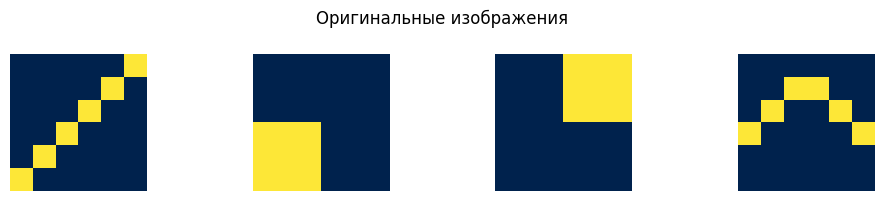

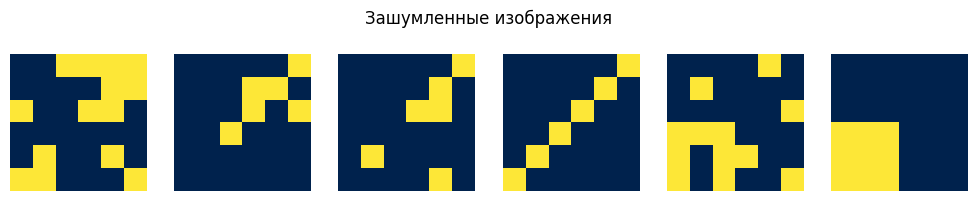

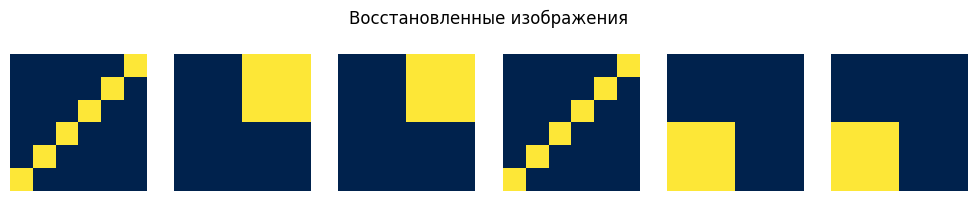

In [ ]:
# развертка векторов тренировочной выборки
pattern_vecs = [to_vector(p) for p in Train]

# развертка векторов тестовой зашумленной выборки
noisy_vecs = [to_vector(np.array(n)) for n in Test_Noise]

# обучение сети Хопфилда
net = HopfieldNetwork(size=36)
net.set_weights(pattern_vecs)

# восстановление зашумленных данных с помощью расстояния Хэмминга
recovered_vecs = [closest_trained_pattern(net.predict(v), pattern_vecs) for v in noisy_vecs]

# визуализация
original_images = [p for p in Train]
noisy_images = [np.array(n) for n in Test_Noise]
recovered_images = [to_matrix(v) for v in recovered_vecs]
show_images(original_images, "Оригинальные изображения", n_rows=1)
show_images(noisy_images, "Зашумленные изображения", n_rows=1)
show_images(recovered_images, "Восстановленные изображения", n_rows=1)

### 2. Двунаправленная ассоциативная память

In [ ]:
# матрицу в вектор
def binarize(matrix):
    return np.where(matrix == 1, 1, -1).flatten()

# вектор в матрицу
def debinarize(vector):
    return np.where(vector == 1, 1, 0).reshape((9, 7))

# класс двунаправленной ассоциативной памяти
class BAM:
    def __init__(self):
        self.W = None

    def train(self, X, Y):
        self.W = np.dot(X.T,Y)

    def recall(self, x, steps=5):
        for _ in range(steps):
            y = np.sign(np.dot(x,self.W))
            x = np.sign(np.dot(y,self.W.T))
        return y, x

In [ ]:
# эталонные цифры
patterns = [
    np.array([[0,0,0,0,0,0,0],
              [0,0,0,1,0,0,0],
              [0,0,1,1,0,0,0],
              [0,0,0,1,0,0,0],
              [0,0,0,1,0,0,0],
              [0,0,0,1,0,0,0],
              [0,0,0,1,0,0,0],
              [0,1,1,1,1,1,0],
              [0,0,0,0,0,0,0]]),

    np.array([[0,0,0,0,0,0,0],
              [0,1,1,1,1,1,0],
              [0,0,0,0,0,1,0],
              [0,0,0,0,0,1,0],
              [0,1,1,1,1,1,0],
              [0,1,0,0,0,0,0],
              [0,1,0,0,0,0,0],
              [0,1,1,1,1,1,0],
              [0,0,0,0,0,0,0]]),

    np.array([[0,0,0,0,0,0,0],
              [0,1,1,1,1,1,0],
              [0,0,0,0,0,1,0],
              [0,0,0,0,0,1,0],
              [0,0,0,1,1,1,0],
              [0,0,0,0,0,1,0],
              [0,0,0,0,0,1,0],
              [0,1,1,1,1,1,0],
              [0,0,0,0,0,0,0]])
]

X = np.array([binarize(p) for p in patterns])
Y = np.array([
    [1, -1, -1],  #цифра 1
    [-1, 1, -1],  #цифра 2
    [-1, -1, 1]   #цифра 3
])

In [ ]:
# цифры с шумом
noisy_raw = [
    [[0,1,1,1,1,1,0],
     [1,1,0,0,0,1,1],
     [0,0,0,0,0,1,0],
     [0,0,0,0,1,1,0],
     [0,0,0,0,0,1,0],
     [0,0,0,0,0,0,1],
     [0,0,0,0,0,1,1],
     [1,1,0,0,0,1,0],
     [0,1,1,1,1,1,0]], #3

    [[0,0,1,1,0,0,0],
     [0,0,1,1,0,0,0],
     [0,0,0,1,0,0,0],
     [0,0,1,1,0,0,0],
     [0,0,1,0,0,0,0],
     [0,0,1,1,0,0,0],
     [0,0,1,1,0,0,0],
     [0,0,1,0,0,0,0],
     [0,0,0,0,0,0,0]], #1

    [[0,1,0,0,0,0,0],
     [0,1,1,1,1,1,0],
     [1,0,0,0,0,1,0],
     [0,0,1,0,0,1,0],
     [0,1,1,1,1,1,0],
     [0,1,0,0,0,0,1],
     [0,1,0,1,0,0,0],
     [1,1,1,1,1,1,0],
     [1,1,0,0,0,1,0]], #2
]

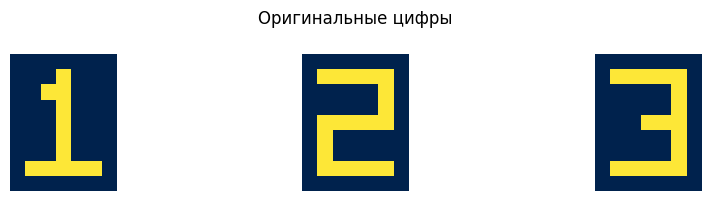

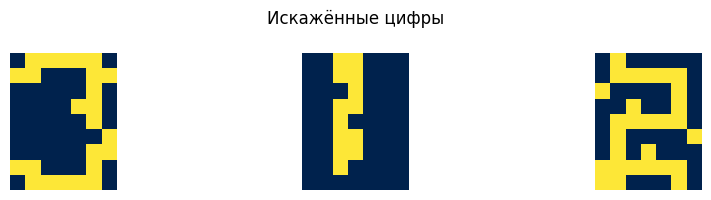

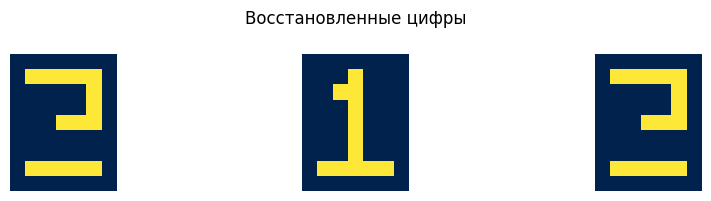

In [ ]:
'''2 И 3 очень похожи между собой, поэтому при улучшении программы работой с расстоянием Хэмминга, как
в предыдущем задании, BAM их путает и делает ошибочные восстановления, поэтому я оставил
восстановление таким, как это сделала сама сеть, без поиска ближайшего эталонного образа'''

X_noisy = np.array([binarize(np.array(x)) for x in noisy_raw])

#обучение
net = BAM()
net.train(X, Y)

#восстановление
restored = []
for x in X_noisy:
    y, x_restored = net.recall(x.copy())
    restored.append(debinarize(x_restored))

#визуализация
show_images([debinarize(x) for x in X], "Оригинальные цифры")
show_images([debinarize(x) for x in X_noisy], "Искажённые цифры")
show_images(restored, "Восстановленные цифры")

### 3. Двунаправленная ассоциативная память со сжатием

In [ ]:
#преобразование изображения в вектор
def image_to_vector(filepath, size=(32, 32)):
    img = Image.open(filepath).convert('L').resize(size)
    img = np.array(img)
    binary = np.where(img < 128, 1, -1)
    return binary.flatten()

#преобразование вектора в изображение
def vector_to_image(vector, size=(32, 32)):
    img = vector.reshape(size)
    img = np.where(img == 1, 0, 255).astype(np.uint8)
    return Image.fromarray(img)

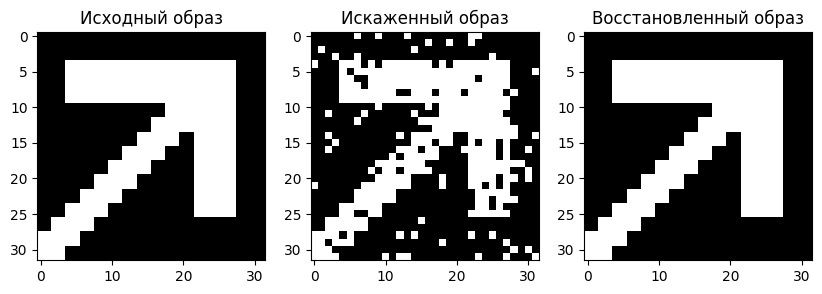

In [ ]:
vec1 = image_to_vector("/content/arrow.bmp")
vec2 = image_to_vector("/content/pressed_arrow.bmp")

# создаем BAM и обучаем на двух векторах
net = BAM()
X = np.array([vec1, vec2])
Y = np.array([vec1, vec2])
net.train(X, Y)

#искажаем второй образ
noisy = vec2.copy()
indices = np.random.choice(len(vec2), size=100, replace=False)
noisy[indices] *= -1

#восстановление изображения
restored, _ = net.recall(noisy)

#визуализация
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.title("Исходный образ")
plt.imshow(vector_to_image(vec2), cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Искаженный образ")
plt.imshow(vector_to_image(noisy), cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Восстановленный образ")
plt.imshow(vector_to_image(restored), cmap='gray')
plt.show()